# MNIST Digit Classification Dataset

In [2]:

#!pip install tensorflow

In [4]:
# Import required libraries

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [83]:
# Load dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [85]:
# Understanding dataset

print(f"Training dataset shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Testing dataset shape: {x_test.shape}, Labels shape: {y_test.shape}")

Training dataset shape: (60000, 28, 28), Labels shape: (60000,)
Testing dataset shape: (10000, 28, 28), Labels shape: (10000,)


The training data has 60000 images of size 28 x 28 and thw testing data has 10000 images of size 28 x 28

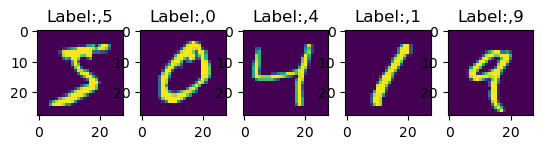

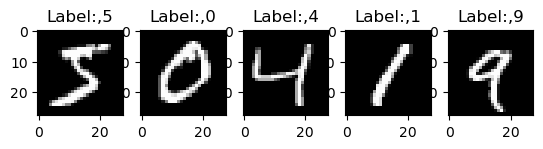

In [88]:
# Viewing first 5 training dataset images along with there label
# Cannot use .head since it is a pandas fn and MNIST dataset is numpy dataset. secondly there are images so we need matplotlib

import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i])
    #plt.title("Label:",y_train[i])
    plt.title(f"Label:,{y_train[i]}")

plt.show()

import matplotlib.pyplot as plt
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[i],cmap="gray")
    #plt.title("Label:",y_train[i])
    plt.title(f"Label:,{y_train[i]}")

plt.show()

The MNIST dataset consists of grayscale images but the matplotlit assumes RGB by defalt. therfore, we need to convert images to grayscale. the size of images is 28 x 28 but they contain pixel valuses from (0-255). Therefore to normalize these images are important, normalization of x_test and x_train would be done by dividing the dataset by 255 so now the images intensity value will range from (0-1).

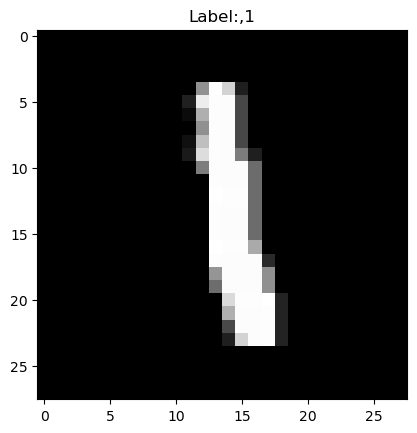

In [234]:
# Normalization of data

x_train=x_train/255.0
x_test=x_test/255.0

# Display a normalized data
plt.imshow(x_train[6],cmap="gray")
plt.title(f"Label:,{y_train[6]}")

plt.show()

Data is now ready to be trained

In [283]:
# Train the data

from keras import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

def create_model():
    model=Sequential()

    model.add(Flatten(input_shape=(28,28)))
    #model.add(Dense(128,activation='relu',input_dim=784))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.02))
    model.add(Dense(10,activation='softmax')) # softmax because is a multiclass classification.

    adam=Adam(learning_rate=0.0035)
    #model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) cannot use binary because its multiclass
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    #sgd=SGD(learning_rate=0.01, momentum=0.9)
    #model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
    return model

def train_model(model):
    callback = EarlyStopping(
        monitor="val_loss",
        min_delta=0.00001,
        patience=5,
        verbose=1,
        mode="auto",
        baseline=None,
        restore_best_weights=False
    )
    
    history=model.fit(x_train, y_train, epochs=18, validation_data=(x_test, y_test),callbacks=callback)
    return history

def accuracy(model):
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")  # Print accuracy


In [285]:
model=create_model()
history=train_model(model)
accuracy(model)

Epoch 1/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8608 - loss: 0.4596 - val_accuracy: 0.9575 - val_loss: 0.1303
Epoch 2/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9597 - loss: 0.1346 - val_accuracy: 0.9721 - val_loss: 0.0923
Epoch 3/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9685 - loss: 0.0995 - val_accuracy: 0.9755 - val_loss: 0.0776
Epoch 4/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9735 - loss: 0.0821 - val_accuracy: 0.9758 - val_loss: 0.0768
Epoch 5/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9771 - loss: 0.0710 - val_accuracy: 0.9766 - val_loss: 0.0753
Epoch 6/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9803 - loss: 0.0607 - val_accuracy: 0.9767 - val_loss: 0.0762
Epoch 7/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9805 - loss: 0.0583 - val_accuracy: 0.9787 - val_loss: 0.0739
Epoch 8/18
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9824 - loss: 0.05

In [287]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


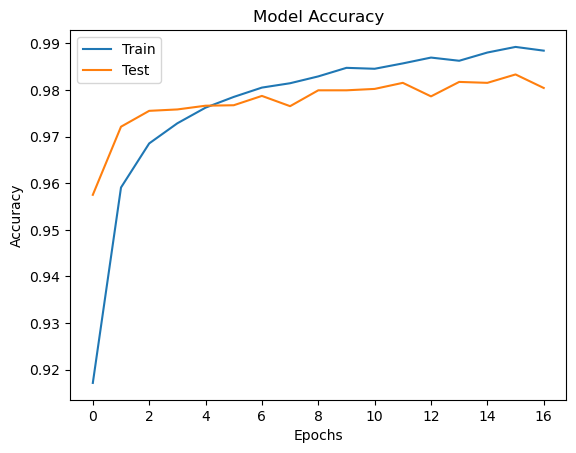

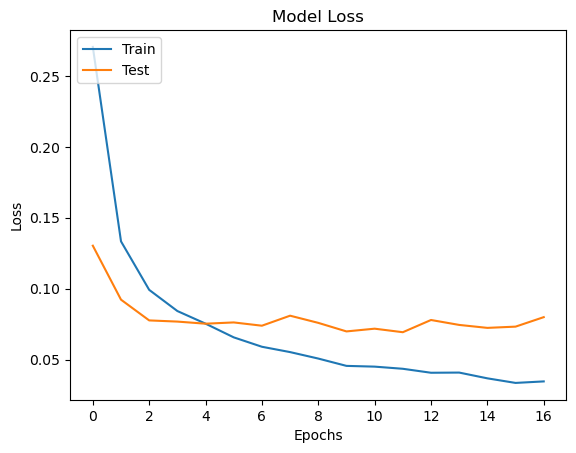

In [288]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
